In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [3]:
def makeTreeClf(x_train, y_train, x_test, y_test):
    clf = DecisionTreeClassifier(criterion='entropy')
    h = clf.fit(x_train, y_train)
    y_prediction = h.predict(x_test)
    s = h.score(x_test, y_prediction)
    acS = sm.accuracy_score(y_test, y_prediction)
    pS = sm.precision_score(y_test, y_prediction, average='macro')
    f1S = sm.f1_score(y_test, y_prediction, average='macro')
    return [acS, 
            pS,
            f1S,
            (acS+pS+f1S)/3
           ]

In [4]:
def makeTreeClfEntropy(x_train, y_train, x_test, y_test):
    clf = DecisionTreeClassifier()
    h = clf.fit(x_train, y_train)
    y_prediction = h.predict(x_test)
    s = h.score(x_test, y_prediction)
    acS = sm.accuracy_score(y_test, y_prediction)
    pS = sm.precision_score(y_test, y_prediction, average='macro')
    f1S = sm.f1_score(y_test, y_prediction, average='macro')
    return [acS, 
            pS,
            f1S,
            (acS+pS+f1S)/3
           ]

In [5]:
def makeTable(table):
    tableAS =np.asarray(table)
    tableAS = np.transpose(tableAS)
    pd.Series(tableAS[0], name='Acc')
    pd.Series(tableAS[1], name='Prc')
    pd.Series(tableAS[2], name='F1')
    pd.Series(tableAS[3], name='Avg')
    final = pd.concat([pd.Series(tableAS[0], name='Acc'),
                      pd.Series(tableAS[1], name='Prc'),
                      pd.Series(tableAS[2], name='F1'),
                      pd.Series(tableAS[3], name='Avg')
                      ], axis=1)
    return final

In [6]:
def multiBarChart(table):
    fig, ax = plt.subplots()
    metrics = ['acc', 'prc', 'f1', 'avg']
    x=np.arange(len(metrics))
    w=0.3
    rect1 = ax.bar(x-w, table[0], w, label='trial 1')
    rect2 = ax.bar(x-w/2, table[1], w, label='trial 2')
    rect3 = ax.bar(x, table[2], w, label='trial 3')
    rect4 = ax.bar(x+w/2, table[3], w, label='trial 4')
    rect5 = ax.bar(x+w, table[3], w, label='trial 5')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)

In [7]:
data1 = pd.read_csv('waveform.data', header='infer')
data1_features = data1.drop('2', axis=1)
data1.head()

,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
0,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
1,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
2,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
3,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
4,-0.00,0.77,1.32,0.29,-1.28,0.84,1.60,1.55,2.93,4.76,...,4.89,2.81,2.37,3.68,-0.98,0.69,0.91,-1.80,0.39,2


In [8]:
data2 = pd.read_csv('german.data', header='infer')
data2.head()

,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


## Part1

### Holdout

In [10]:
table = []
for i in range(0,5):
    x_train, x_test, y_train, y_test = train_test_split(data1_features, data1['2'], test_size=0.10, shuffle=True)
    table.append(makeTreeClfEntropy(x_train, y_train, x_test, y_test))
print(table)

[[0.752, 0.751491337275651, 0.7512783676936294, 0.7515899016564268], [0.754, 0.7533638307393963, 0.7535728160728161, 0.7536455489374041], [0.792, 0.792558708362605, 0.7916517735179767, 0.7920701606268605], [0.766, 0.7664766698744048, 0.7660141399511512, 0.7661636032751854], [0.8, 0.7990627843494086, 0.798978102087021, 0.7993469621454765]]


In [11]:
makeTable(table)

,Acc,Prc,F1,Avg
0,0.752,0.751491,0.751278,0.751590
1,0.754,0.753364,0.753573,0.753646
2,0.792,0.792559,0.791652,0.792070
3,0.766,0.766477,0.766014,0.766164
4,0.800,0.799063,0.798978,0.799347


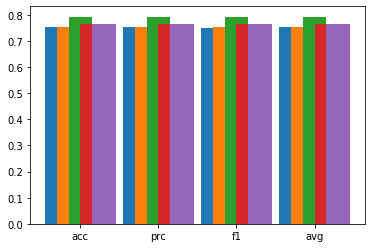

In [12]:
multiBarChart(table)

### Cross Validation

In [99]:
clf = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'f1_macro']
scores =  cross_validate(clf, data1.drop(['2'],axis=1), data1['2'], cv=10, scoring=scoring)

In [100]:
x = np.array([])
for v in scores.values():
    x = np.concatenate([x, v])
x = x.reshape(5,10)
x = x[2:]
x[0]

array([0.77844311, 0.76447106, 0.78243513, 0.77045908, 0.76646707,
       0.736     , 0.764     , 0.75100402, 0.73895582, 0.76907631])

In [101]:
avg=[]
for i in range(10):
    a= (x[0][i]+x[1][i]+x[2][i])/3
    avg = avg+[a]
avg = np.asarray(avg)
x = np.vstack([x,avg])
x=x.transpose()
makeTable(x)

,Acc,Prc,F1,Avg
0,0.778443,0.778638,0.778390,0.778490
1,0.764471,0.764815,0.764313,0.764533
2,0.782435,0.781977,0.781769,0.782060
3,0.770459,0.769869,0.769955,0.770094
4,0.766467,0.766399,0.766329,0.766398
5,0.736000,0.735393,0.735407,0.735600
6,0.764000,0.765913,0.763852,0.764588
7,0.751004,0.752199,0.751121,0.751441
8,0.738956,0.742203,0.739586,0.740248
9,0.769076,0.769005,0.768956,0.769012


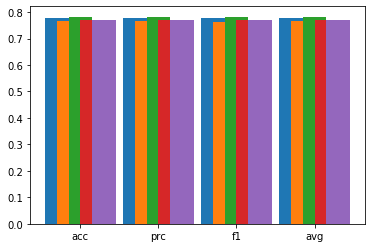

In [102]:
multiBarChart(x)

## Part 2

### Holdout

In [103]:
table = []
for i in range(0,5):
    x_train, x_test, y_train, y_test = train_test_split(data1_features, data1['2'], test_size=0.10, shuffle=True)
    table.append(makeTreeClfEntropy(x_train, y_train, x_test, y_test))
print(table)

[[0.782, 0.7819661881057162, 0.782241430399778, 0.7820692061684981], [0.752, 0.750720620842572, 0.7508215066449218, 0.7511807091624979], [0.772, 0.772895875727886, 0.771982040399703, 0.7722926387091964], [0.74, 0.740064318615886, 0.7388811686481223, 0.7396484957546695], [0.788, 0.78827760714573, 0.7880561768614865, 0.7881112613357389]]


In [104]:
makeTable(table)

,Acc,Prc,F1,Avg
0,0.782,0.781966,0.782241,0.782069
1,0.752,0.750721,0.750822,0.751181
2,0.772,0.772896,0.771982,0.772293
3,0.740,0.740064,0.738881,0.739648
4,0.788,0.788278,0.788056,0.788111


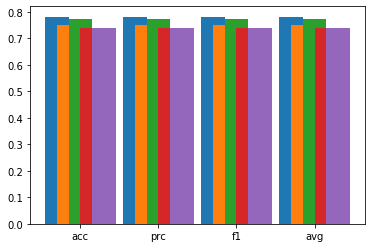

In [105]:
multiBarChart(table)

### Cross Validation k=10

In [106]:
clfE = DecisionTreeClassifier(criterion='entropy')
scoresE =  cross_validate(clf, data1.drop(['2'],axis=1), data1['2'], cv=10, scoring=scoring)

In [107]:
xE = np.array([])
for v in scoresE.values():
    xE = np.concatenate([xE, v])
xE = xE.reshape(5,10)
xE = xE[2:]
avgE=[]
for i in range(10):
    a = (xE[0][i]+xE[1][i]+xE[2][i])/3
    avgE = avgE+[a]
avgE = np.asarray(avgE)
xE = np.vstack([xE,avgE])
xE=xE.transpose()
makeTable(xE)

,Acc,Prc,F1,Avg
0,0.778443,0.779245,0.778511,0.778733
1,0.768463,0.770246,0.768377,0.769029
2,0.776447,0.776121,0.776143,0.776237
3,0.754491,0.753509,0.753564,0.753855
4,0.758483,0.759395,0.758666,0.758848
5,0.740000,0.739609,0.739644,0.739751
6,0.746000,0.748661,0.746164,0.746941
7,0.748996,0.750350,0.749211,0.749519
8,0.736948,0.737434,0.737050,0.737144
9,0.751004,0.751935,0.751122,0.751354


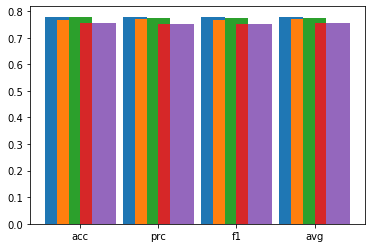

In [108]:
multiBarChart(xE)

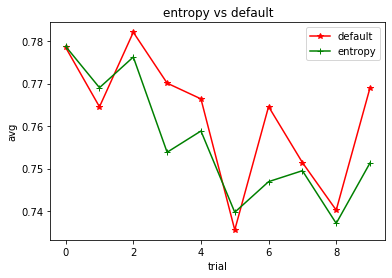

In [109]:
plt.plot(np.transpose(x)[-1], color='red', marker='*', label='default')
plt.plot(np.transpose(xE)[-1], color='green', marker='+', label='entropy')
plt.xlabel('trial')
plt.ylabel('avg')
plt.title('entropy vs default')
plt.legend()
plt.show()

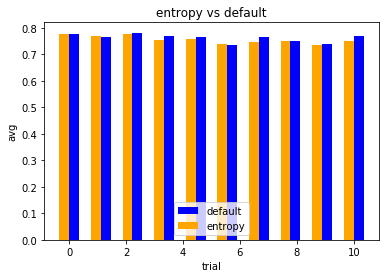

In [110]:
plt.bar(np.linspace(0,10,10)+.35/2,np.transpose(x)[-1],width=0.35, color='blue', label='default')
plt.bar(np.linspace(0,10,10)-.35/2,np.transpose(xE)[-1], width=0.35, color='orange', label='entropy')
plt.xlabel('trial')
plt.ylabel('avg')
plt.title('entropy vs default')
plt.legend()
plt.show()

## Part 3

Text(0, 0.5, 'Accuracy')

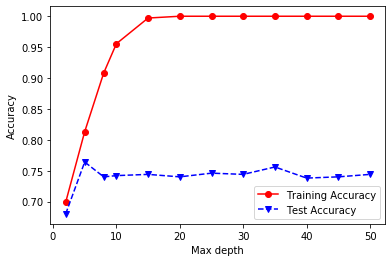

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(data1_features, data1['2'], test_size=0.10, shuffle=True)

maxdepths = [2,5,8,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = sm.accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = sm.accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

This is an overfitting problem, the model becomes to complex (in this case too deep) and performs poorly in the test data, as opposed to the training data. The tree peaks at arond 6-7 node depth, a tree any deeper is specializing the model to classify the training data specifically.